# Computational Linear Algebra: PCA Homework

## Initialization:
Fill the missing values in this text box and in the following code-cell.

**Academic Year:** 2024/2025

### Team Members (Alphabetical Order):
1. Gaudino, Andrea (346119);
2. Grivet Talocia, Lorenzo (346559).


In [1]:
StudentID1 = 346119
StudentID2 = 346559

## Starting Code-Cell 
### Attention: DO NOT CHANGE THE CODE INSIDE THE FOLLOWING CELL!

In [2]:
####################################################################
############## DO NOT CHANGE THE CODE IN THIS CELL #################
####################################################################

import numpy as np

var_entertainment_feat_types = ['Interests', 'Movies', 'Music']
var_personal_feat_types = ['Finance', 'Phobias']
fixed_feat_types = ['Personality', 'Health']

label_types = ['Demographic']

variables_by_type = {
    'Demographics': ['Age', 'Height', 'Weight', 'Number of siblings', 
                     'Gender', 'Hand', 'Education', 'Only child', 'Home Town Type',
                     'Home Type'],
    'Finance': ['Finances', 'Shopping centres', 'Branded clothing', 
                'Entertainment spending', 'Spending on looks', 
                'Spending on gadgets', 'Spending on healthy eating'],
    'Health': ['Smoking', 'Alcohol', 'Healthy eating'],
    'Interests': ['History', 'Psychology', 'Politics', 'Mathematics', 
                  'Physics', 'Internet', 'PC', 'Economy Management', 
                  'Biology', 'Chemistry', 'Reading', 'Geography', 
                  'Foreign languages', 'Medicine', 'Law', 'Cars', 
                  'Art exhibitions', 'Religion', 'Countryside, outdoors', 
                  'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 
                  'Active sport', 'Gardening', 'Celebrities', 'Shopping', 
                  'Science and technology', 'Theatre', 'Fun with friends', 
                  'Adrenaline sports', 'Pets'],
    'Movies': ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 
               'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 
               'Documentary', 'Western', 'Action'],
    'Music': ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 
              'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 
              'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 
              'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 
              'Techno, Trance', 'Opera'],
    'Personality': ['Daily events', 'Prioritising workload', 
                    'Writing notes', 'Workaholism', 'Thinking ahead', 
                    'Final judgement', 'Reliability', 'Keeping promises', 
                    'Loss of interest', 'Friends versus money', 'Funniness', 
                    'Fake', 'Criminal damage', 'Decision making', 'Elections', 
                    'Self-criticism', 'Judgment calls', 'Hypochondria', 
                    'Empathy', 'Eating to survive', 'Giving', 
                    'Compassion to animals', 'Borrowed stuff', 
                    'Loneliness', 'Cheating in school', 'Health', 
                    'Changing the past', 'God', 'Dreams', 'Charity', 
                    'Number of friends', 'Punctuality', 'Lying', 'Waiting', 
                    'New environment', 'Mood swings', 'Appearence and gestures', 
                    'Socializing', 'Achievements', 'Responding to a serious letter', 
                    'Children', 'Assertiveness', 'Getting angry', 
                    'Knowing the right people', 'Public speaking', 
                    'Unpopularity', 'Life struggles', 'Happiness in life', 
                    'Energy levels', 'Small - big dogs', 'Personality', 
                    'Finding lost valuables', 'Getting up', 'Interests or hobbies', 
                    "Parents' advice", 'Questionnaires or polls', 'Internet usage'],
    'Phobias': ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 
                'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
}

labels = variables_by_type['Demographics']

try:
    random_seed = min([StudentID1, StudentID2])
except NameError:
    random_seed = StudentID1

def which_featgroups():
    np.random.seed(random_seed)
    these_entertainments = np.random.choice(var_entertainment_feat_types, 2, replace=False).tolist()
    these_personal = np.random.choice(var_personal_feat_types, 1, replace=False).tolist()
    these_types = fixed_feat_types + these_personal + these_entertainments
    print('*** THESE ARE THE SELECTED TYPE OF VARIABLES:')
    for k in these_types:
        print(f'{k}')
    print('*************************************')
    return these_types

def which_features(these_types):
    np.random.seed(random_seed)
    these_features = []
    for type in these_types:
        if type != 'Personality':
            these_features += variables_by_type[type]
        else:
            these_features += np.random.choice(variables_by_type[type], 
                                               int(2 * (len(variables_by_type[type]) / 3)), 
                                               replace=False).tolist()
    print('*** THESE ARE THE SELECTED FEATURES:')
    for ft in these_features:
        print(f'{ft}')
    print('*************************************')
    return these_features

these_types = which_featgroups()
these_features = which_features(these_types)

np.random.seed(random_seed)


*** THESE ARE THE SELECTED TYPE OF VARIABLES:
Personality
Health
Finance
Interests
Music
*************************************
*** THESE ARE THE SELECTED FEATURES:
Appearence and gestures
Loss of interest
Prioritising workload
Workaholism
Daily events
Assertiveness
New environment
Writing notes
Getting angry
Funniness
Number of friends
God
Elections
Mood swings
Health
Reliability
Small - big dogs
Borrowed stuff
Dreams
Loneliness
Internet usage
Unpopularity
Interests or hobbies
Cheating in school
Giving
Charity
Life struggles
Final judgement
Eating to survive
Personality
Judgment calls
Changing the past
Parents' advice
Finding lost valuables
Getting up
Decision making
Knowing the right people
Fake
Smoking
Alcohol
Healthy eating
Finances
Shopping centres
Branded clothing
Entertainment spending
Spending on looks
Spending on gadgets
Spending on healthy eating
History
Psychology
Politics
Mathematics
Physics
Internet
PC
Economy Management
Biology
Chemistry
Reading
Geography
Foreign languages

## Importing Modules

In the following cell, import all the modules you think are necessary for doing the homework, **among the ones listed and used during the laboratories of the course**.
No extra modules are allowed for reproducibility.

In [3]:
# DO NOT IMPORT NUMPY
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans

%matplotlib widget

## Exercise 1. Preparing the Dataset

In the cells below, do the following operations:
1. load the dataset "_responses_hw.csv_";
2. create a working dataframe extracting from _responses_hw.csv_ the columns corresponding to the variables in _these_features_, and randomly selecting 2/3 of the rows. Let us call this dataframe _X_df_;
3. analyze the obtained dataframe and performing cleansing/encoding operations.

In [4]:
df_responses = pd.read_csv("responses_hw.csv")

df_tot=df_responses.loc[:,these_features+labels]
df_tot = df_tot.sample(n=int(np.round(len(df_tot)*2/3)), random_state=random_seed)

df_tot=df_tot.dropna()


print(df_tot.info())

X_df=df_tot.loc[:,these_features]
X_labels=df_tot.loc[:,labels]

print(X_df.info())
print(X_labels.info())


X_df=X_df.copy() #se non scrivo questo dopo non riesce a fare il mapping per le categoriche
display(df_tot)

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 581 to 194
Columns: 109 entries, Appearence and gestures to Home Type
dtypes: float64(96), int64(4), object(9)
memory usage: 403.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 581 to 194
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Appearence and gestures     469 non-null    float64
 1   Loss of interest            469 non-null    float64
 2   Prioritising workload       469 non-null    float64
 3   Workaholism                 469 non-null    float64
 4   Daily events                469 non-null    float64
 5   Assertiveness               469 non-null    float64
 6   New environment             469 non-null    float64
 7   Writing notes               469 non-null    float64
 8   Getting angry               469 non-null    float64
 9   Funniness                   469 non-null    float64
 10  Number of f

,Appearence and gestures,Loss of interest,Prioritising workload,Workaholism,Daily events,Assertiveness,New environment,Writing notes,Getting angry,Funniness,...,Age,Height,Weight,Number of siblings,Gender,Hand,Education,Only child,Home Town Type,Home Type
581,3.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0,1.0,3.0,...,22.0,164.0,55.0,1.0,female,right,secondary school,no,city,block of flats
754,2.0,1.0,2.0,2.0,3.0,3.0,5.0,2.0,2.0,4.0,...,26.0,186.0,98.0,1.0,male,right,college/bachelor degree,yes,city,house/bungalow
184,3.0,3.0,1.0,3.0,2.0,1.0,3.0,3.0,2.0,5.0,...,21.0,174.0,85.0,0.0,female,right,college/bachelor degree,yes,city,house/bungalow
903,3.0,2.0,5.0,4.0,5.0,4.0,5.0,4.0,3.0,4.0,...,19.0,188.0,75.0,1.0,male,right,college/bachelor degree,no,city,block of flats
155,2.0,5.0,5.0,5.0,4.0,4.0,1.0,5.0,1.0,1.0,...,19.0,171.0,72.0,1.0,female,right,secondary school,no,city,block of flats
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,3.0,2.0,4.0,4.0,3.0,3.0,3.0,4.0,3.0,3.0,...,22.0,185.0,90.0,1.0,male,right,college/bachelor degree,no,city,block of flats
734,2.0,1.0,4.0,3.0,2.0,3.0,4.0,5.0,3.0,1.0,...,19.0,168.0,56.0,3.0,female,right,secondary school,no,city,block of flats
60,4.0,4.0,1.0,5.0,4.0,2.0,5.0,2.0,3.0,4.0,...,23.0,175.0,72.0,1.0,male,right,college/bachelor degree,no,city,block of flats
555,2.0,5.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,1.0,...,21.0,167.0,63.0,1.0,female,right,college/bachelor degree,yes,village,house/bungalow


In [5]:
#map smoking
np.unique(X_df["Smoking"].values)
map_smoking={
    'never smoked':1,
    'tried smoking':2,
    'former smoker':3,
    'current smoker':4
}
#smoking_int=X_df["Smoking"].map(map_smoking)
X_df["Smoking"]=X_df["Smoking"].map(map_smoking)


In [6]:
#map internet usage
np.unique(X_df["Internet usage"].values)
map_internetusage={
    'less than an hour a day':1,
    'few hours a day':3,
    'most of the day':5
}
X_df["Internet usage"]=X_df["Internet usage"].map(map_internetusage)

In [7]:
#map alcohol
np.unique(X_df["Alcohol"].values)
map_alcohol={
    'never':1,
    'social drinker':3,
    'drink a lot':5
}
#smoking_int=X_df["Smoking"].map(map_smoking)
X_df["Alcohol"]=X_df["Alcohol"].map(map_alcohol)

In [8]:
X_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 469 entries, 581 to 194
Data columns (total 99 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Appearence and gestures     469 non-null    float64
 1   Loss of interest            469 non-null    float64
 2   Prioritising workload       469 non-null    float64
 3   Workaholism                 469 non-null    float64
 4   Daily events                469 non-null    float64
 5   Assertiveness               469 non-null    float64
 6   New environment             469 non-null    float64
 7   Writing notes               469 non-null    float64
 8   Getting angry               469 non-null    float64
 9   Funniness                   469 non-null    float64
 10  Number of friends           469 non-null    int64  
 11  God                         469 non-null    float64
 12  Elections                   469 non-null    float64
 13  Mood swings                 469 non-nu

## Exercise 2. Analyzing the Variance and the PCs

In the cells below, do the following operations:
1. create two new dataframes from _X_df_ applying a StandardScaler and a MinMaxscaler. Call these new dataframes as _Xstd_df_ and _Xmm_df_, respectively;
2. compute the variance of all the features in _X_df_, _Xstd_df_, and _Xmm_df_ and **comment the results**;
3. compute all the $n$ Principal Components (PCs) for each dataset _X_df_, _Xstd_df_, and _Xmm_df_. Then, visualize the curves of the cumulative explained variances and **comment the results**.

In [9]:
#standard scaler
std_scaler = StandardScaler()
std_scaler.fit(X_df)
Xstd_df = std_scaler.transform(X_df)


In [10]:
mm_scaler= MinMaxScaler()
mm_scaler.fit(X_df)
Xmm_df=mm_scaler.transform(X_df)


In [ ]:
print("Varianza dataset originale:\n",np.var(X_df,axis=0))
print()
print("\nVarianza standard scaler (uguale a 1 per funzionamento di standard scaler):\n",np.var(Xstd_df,axis=0))
print()
print("\nVarianza minmaxscaler:\n",np.var(Xmm_df,axis=0))

Varianza dataset originale:
 Appearence and gestures    0.903524
Loss of interest           1.804138
Prioritising workload      1.474843
Workaholism                1.677925
Daily events               1.262433
                             ...   
Rock n roll                1.481935
Alternative                1.705048
Latino                     1.765949
Techno, Trance             1.749219
Opera                      1.425071
Length: 99, dtype: float64


Varianza standard scaler (uguale a 1 per funzionamento di standard scaler):
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1.]


Varianza minmaxscaler:
 [0.05647024 0.11275863 0.0921777  0.1048703  0.07890206 0.07335278
 0.08757121 0.13274001 0.0856237  0.07939532 0.07044374 0.14116593
 0.168

In [12]:
#pca init and fit
print(X_df.shape[1])
pca_xdf = PCA(n_components=X_df.shape[1])
pca_xstd_df = PCA(n_components=Xstd_df.shape[1])
pca_xmm_df = PCA(n_components=Xmm_df.shape[1])

pca_xdf.fit(X_df)
pca_xstd_df.fit(Xstd_df)
pca_xmm_df.fit(Xmm_df)

99


PCA(n_components=99)

0.0010086974705014332
0.010589449327447615
0.010034851047320988


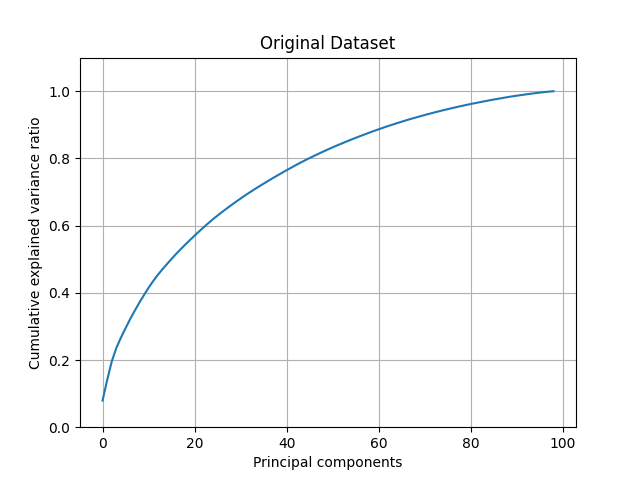

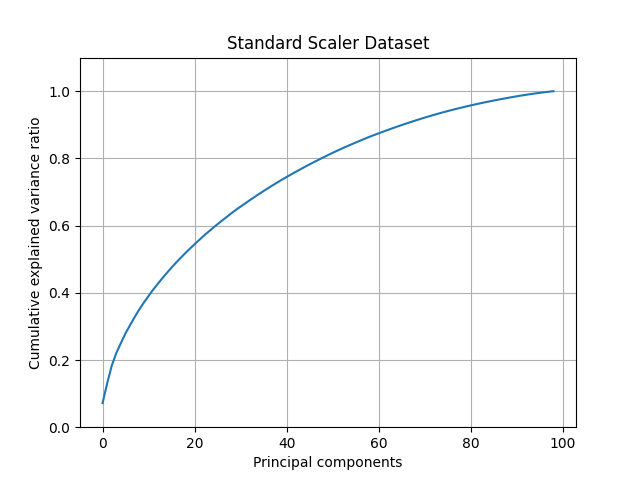

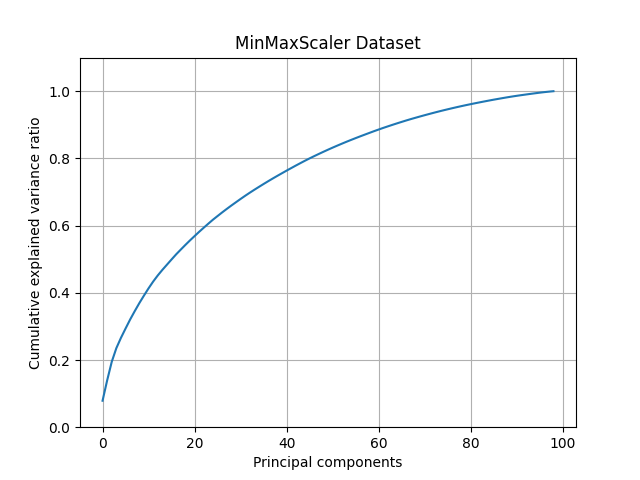

In [13]:
#plot

plt.figure()
plt.plot(np.cumsum(pca_xdf.explained_variance_ratio_))
plt.title('Original Dataset')
plt.ylim([0, 1.1])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.grid()
#plt.show()

plt.figure()
plt.plot(np.cumsum(pca_xstd_df.explained_variance_ratio_))
plt.title('Standard Scaler Dataset')
plt.ylim([0, 1.1])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.grid()
#plt.show()

plt.figure()
plt.plot(np.cumsum(pca_xmm_df.explained_variance_ratio_))
plt.title('MinMaxScaler Dataset')
plt.ylim([0, 1.1])
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance ratio')
plt.grid()
#plt.show()


print(np.linalg.norm(pca_xdf.explained_variance_ratio_ - pca_xmm_df.explained_variance_ratio_))
print(np.linalg.norm(pca_xdf.explained_variance_ratio_ - pca_xstd_df.explained_variance_ratio_))
print(np.linalg.norm(pca_xstd_df.explained_variance_ratio_ - pca_xmm_df.explained_variance_ratio_))


In [14]:
#perché sono uguali?
#chat:
#Se i grafici sono uguali, significa che le relazioni tra le caratteristiche (e quindi i componenti principali) non sono influenzate dalla scala dei dati.
#Questo è un risultato atteso se le caratteristiche del dataset originale non hanno differenze di scala tali da influenzare la PCA.
#Spiegazione nostra: Tutti i dati del dataset hanno valori che vanno tra 1 e 5, quindi quando si applica lo scaler in realtà 
#non cambia quasi nulla nella distribuzione dei dati.

## Exercise 3. Dimensionality Reduction and PC Interpretation

In the cells below, do the following operations:
1. For each one of the two dataframes _Xstd_df_, and _Xmm_df_, compute a new PCA for performing a dimensionality reduction with respect to $m$ dimensions. The value of $m$ must be $$m = \min\{m', 5\}\,,$$ where $m'$ is the value required for obtaining $33\%$ of the total variance.
2. For both the cases, visualize all the PCs and give a name/interpretation to them. **Comment and motivate your interpretations**. If possible, **compare the differences among the results obtained** for _Xstd_df_ and _Xmm_df_.
3. Perform the score graph for both the cases (_std_ and _mm_). If $m>3$, plot the score graph with respect to the first 3 PCs. All the **plots must show the names of the PCs on the axes** for better understanding the results.
4. **Optional:** plot more score graphs, coloring the dots with respect to any label in the list _labels_ that you believe can be interesting. **Comment and analyze this optional plots**.

In [15]:
#Xstd
cum_variance = np.cumsum(pca_xstd_df.explained_variance_ratio_)
i = 0
while cum_variance[i] < 0.33:
    i += 1
print(i, cum_variance[i])
print(cum_variance[4])
m_std = min(5, i+1)



8 0.35077777554652806
0.25082415049631546


In [16]:
#Xmm
cum_variance = np.cumsum(pca_xmm_df.explained_variance_ratio_)
i = 0
while cum_variance[i] < 0.33:
    i += 1
print(i, cum_variance[i])
print(cum_variance[4])
m_mm = min(5, i+1)


7 0.3455113735513347
0.2659599877390022


In [17]:
pca_std_m=PCA(n_components=m_std)
pca_mm_m=PCA(n_components=m_mm)

pca_std_m.fit(Xstd_df)
pca_mm_m.fit(Xmm_df)

PCA(n_components=5)

In [18]:
#Definizione del colore 
color_set = cm.Set3.colors
key_colors = {key: color_set[i] for i,key in enumerate(these_types)}


rows = []
for i in variables_by_type.keys():
    for j in variables_by_type[i]:
        if j in these_features:
            rows.append([i, j, key_colors[i]])

df_type_colors = pd.DataFrame(rows, columns=['type', 'feature', 'color'])
df_type_colors


,type,feature,color
0,Finance,Finances,"(0.7450980392156863, 0.7294117647058823, 0.854..."
1,Finance,Shopping centres,"(0.7450980392156863, 0.7294117647058823, 0.854..."
2,Finance,Branded clothing,"(0.7450980392156863, 0.7294117647058823, 0.854..."
3,Finance,Entertainment spending,"(0.7450980392156863, 0.7294117647058823, 0.854..."
4,Finance,Spending on looks,"(0.7450980392156863, 0.7294117647058823, 0.854..."
...,...,...,...
94,Personality,Finding lost valuables,"(0.5529411764705883, 0.8274509803921568, 0.780..."
95,Personality,Getting up,"(0.5529411764705883, 0.8274509803921568, 0.780..."
96,Personality,Interests or hobbies,"(0.5529411764705883, 0.8274509803921568, 0.780..."
97,Personality,Parents' advice,"(0.5529411764705883, 0.8274509803921568, 0.780..."


In [19]:
set([df_type_colors[df_type_colors["feature"]==c]["color"].values[0] for c in X_df.columns])


{(0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (1.0, 1.0, 0.7019607843137254)}

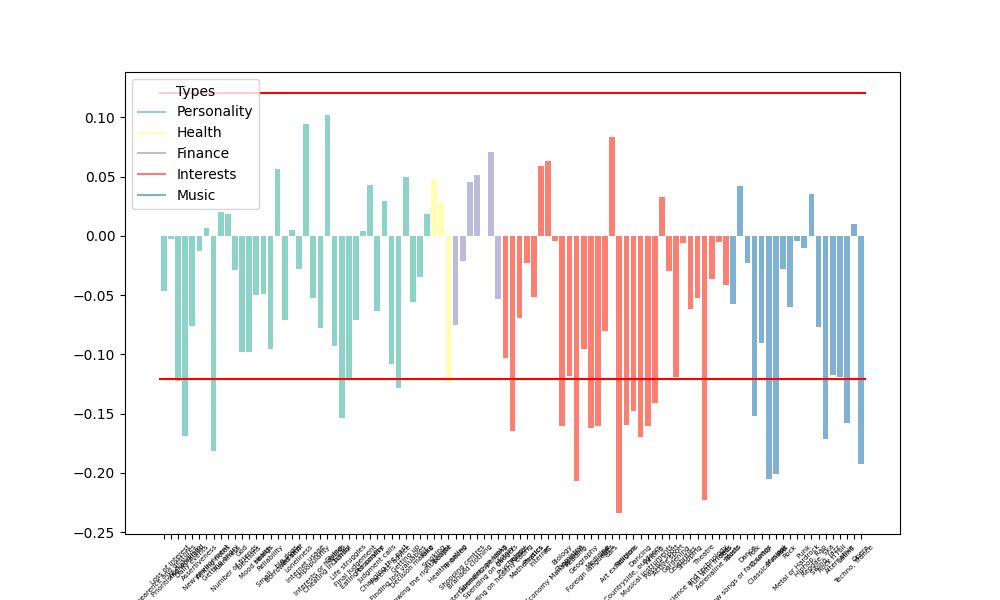


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: []

HIGH-VALUED NEGATIVE COMPONENTS: ['Prioritising workload', 'Workaholism', 'Writing notes', 'Charity', 'Finding lost valuables', 'Healthy eating', 'Psychology', 'Biology', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Theatre', 'Folk', 'Classical music', 'Musical', 'Swing, Jazz', 'Latino', 'Opera']
*********************************************



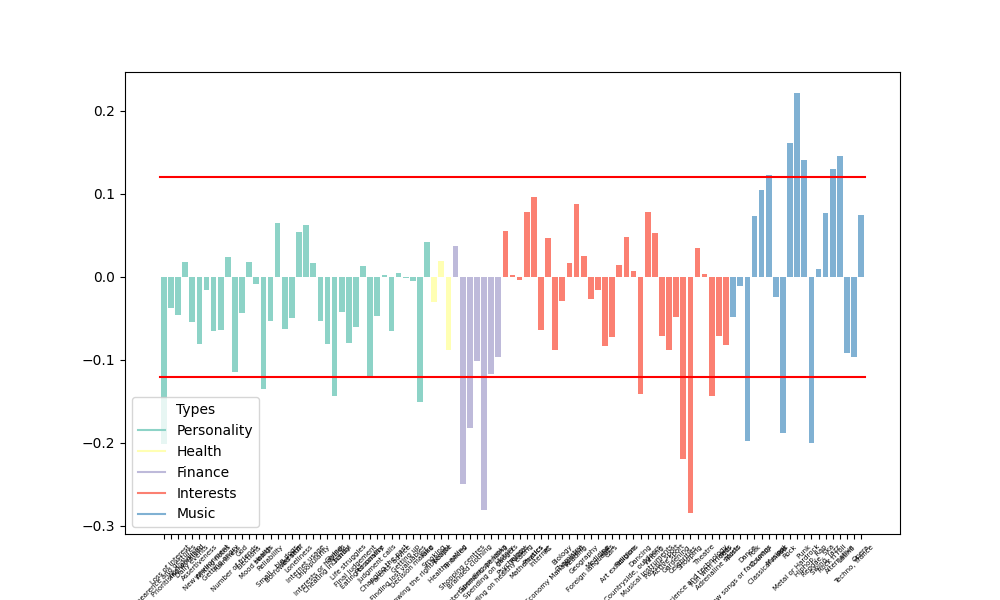


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Classical music', 'Rock', 'Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative']

HIGH-VALUED NEGATIVE COMPONENTS: ['Appearence and gestures', 'Health', 'Giving', 'Personality', 'Knowing the right people', 'Shopping centres', 'Branded clothing', 'Spending on looks', 'Dancing', 'Celebrities', 'Shopping', 'Fun with friends', 'Dance', 'Pop', 'Hiphop, Rap']
*********************************************



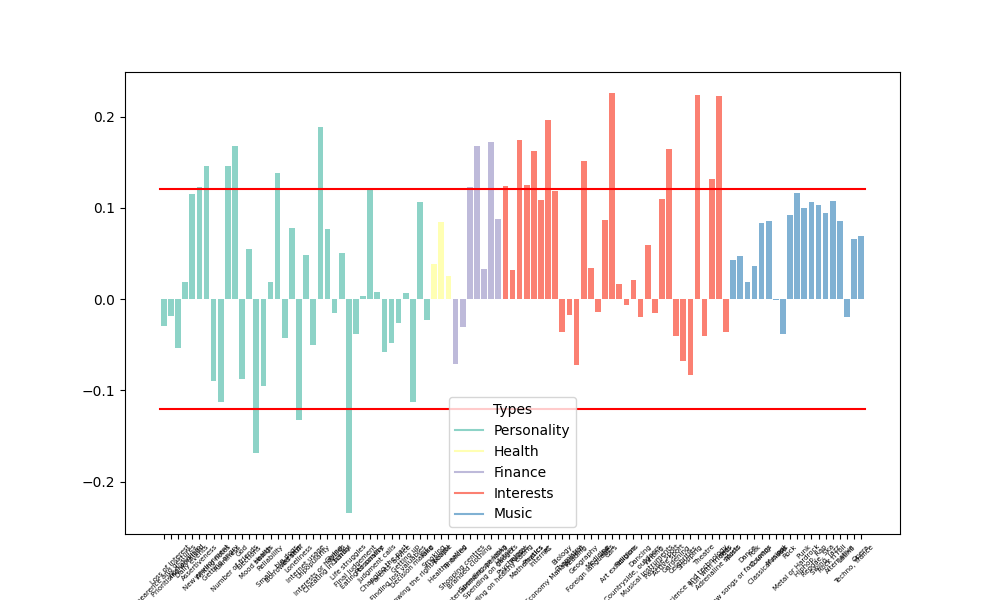


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Assertiveness', 'New environment', 'Funniness', 'Number of friends', 'Small - big dogs', 'Interests or hobbies', 'Branded clothing', 'Entertainment spending', 'Spending on gadgets', 'History', 'Politics', 'Mathematics', 'Physics', 'PC', 'Geography', 'Cars', 'Active sport', 'Science and technology', 'Fun with friends', 'Adrenaline sports']

HIGH-VALUED NEGATIVE COMPONENTS: ['Mood swings', 'Loneliness', 'Life struggles']
*********************************************



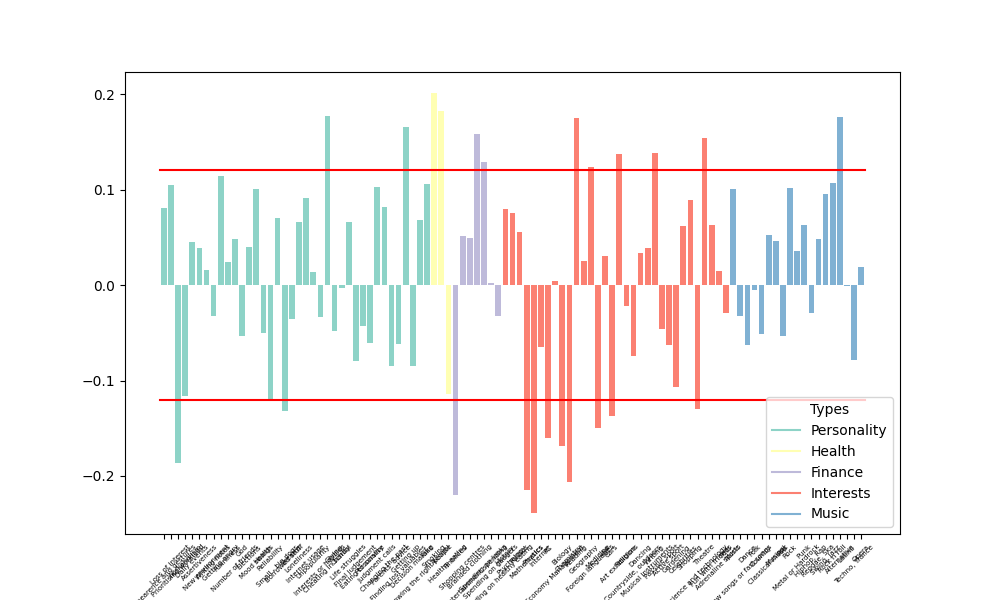


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Cheating in school', 'Getting up', 'Smoking', 'Alcohol', 'Entertainment spending', 'Spending on looks', 'Reading', 'Foreign languages', 'Art exhibitions', 'Writing', 'Theatre', 'Alternative']

HIGH-VALUED NEGATIVE COMPONENTS: ['Prioritising workload', 'Reliability', 'Borrowed stuff', 'Finances', 'Mathematics', 'Physics', 'PC', 'Biology', 'Chemistry', 'Medicine', 'Cars', 'Science and technology']
*********************************************



In [ ]:

eps = (1/pca_std_m.n_features_in_)**(1/2)*1.2

colors_type = df_type_colors['color']

type_colors_legend = [Line2D([0], [0], color=key_colors[k], label = k) for k in key_colors.keys()]


def plot_pcs(df, pca,m):

    for ii in range(m):
        plt.figure(figsize=(10,6))
        plt.bar(df.columns,pca.components_[ii] , color = [df_type_colors[df_type_colors["feature"]==c]["color"].values[0] for c in df.columns])
        plt.plot([-0.5, pca.n_features_in_ - 0.5], [eps, eps], 'red')
        plt.plot([-0.5, pca.n_features_in_ - 0.5], [-eps, -eps], 'red')
        plt.legend(handles = type_colors_legend, title="Types")
        plt.xticks(rotation = 45,fontsize=5)
        plt.show()
        
                
        pos = []
        neg = []
        for i in range(len(pca.components_[ii])):
            if np.abs(pca.components_[ii][i]) > eps:
                if pca.components_[ii][i] > 0:
                    pos.append(df.columns[i])
                else:
                    neg.append(df.columns[i])
        
        print('')
        print(f'****************** PC{ii+1} **********************')
        print(f'HIGH-VALUED POSITIVE COMPONENTS: {pos}') 
        print('')
        print(f'HIGH-VALUED NEGATIVE COMPONENTS: {neg}')  
        print('*********************************************')
        print('')
        
        

plot_pcs(X_df,pca_std_m,m_std)

PC1: cultured, reliable

PC2: appearance, spender, fun lover

PC3: introvert, antisocial

PC4: proactive, goal-oriented, hard worker

PC5: emotionally unstable, nerd

In [21]:
names_pc_std=["cultured, reliable", "appearance, spender, fun-lover","introvert, antisocial","proactive, goal-oriented, hardworker","emotionally unstable, nerd"]


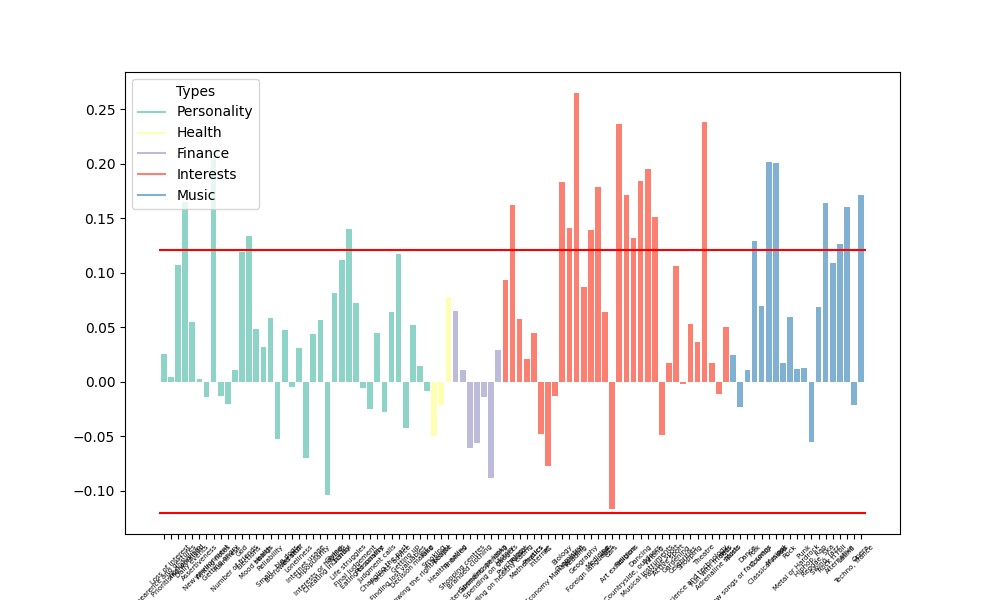


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Workaholism', 'Writing notes', 'Elections', 'Life struggles', 'Psychology', 'Biology', 'Chemistry', 'Reading', 'Foreign languages', 'Medicine', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Theatre', 'Folk', 'Classical music', 'Musical', 'Swing, Jazz', 'Alternative', 'Latino', 'Opera']

HIGH-VALUED NEGATIVE COMPONENTS: []
*********************************************



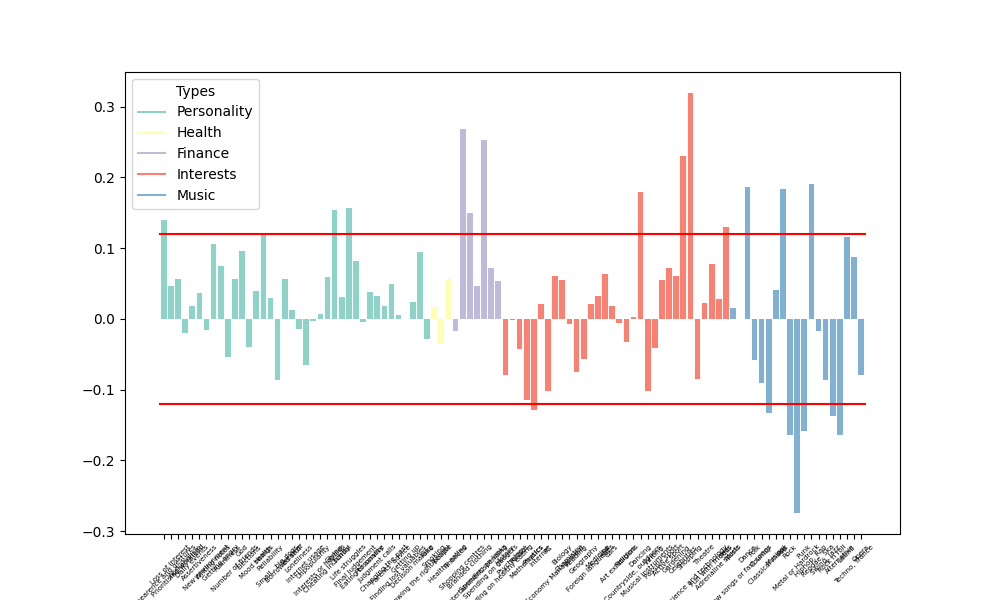


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Appearence and gestures', 'Giving', 'Life struggles', 'Shopping centres', 'Branded clothing', 'Spending on looks', 'Dancing', 'Celebrities', 'Shopping', 'Pets', 'Dance', 'Pop', 'Hiphop, Rap']

HIGH-VALUED NEGATIVE COMPONENTS: ['Physics', 'Classical music', 'Rock', 'Metal or Hardrock', 'Punk', 'Rock n roll', 'Alternative']
*********************************************



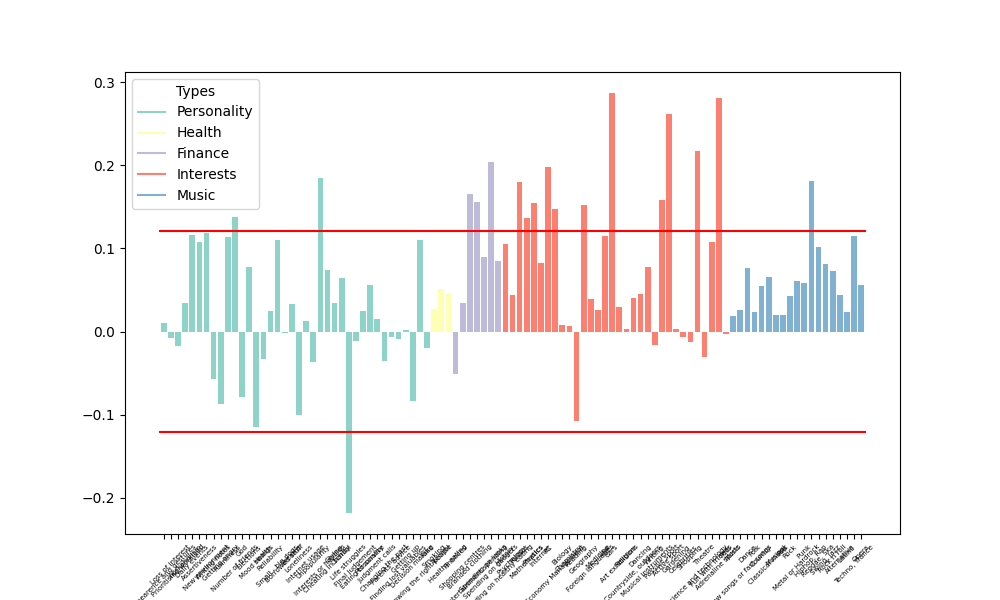


****************** PC3 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Number of friends', 'Interests or hobbies', 'Branded clothing', 'Entertainment spending', 'Spending on gadgets', 'Politics', 'Mathematics', 'Physics', 'PC', 'Economy Management', 'Geography', 'Cars', 'Passive sport', 'Active sport', 'Science and technology', 'Adrenaline sports', 'Hiphop, Rap']

HIGH-VALUED NEGATIVE COMPONENTS: ['Life struggles']
*********************************************



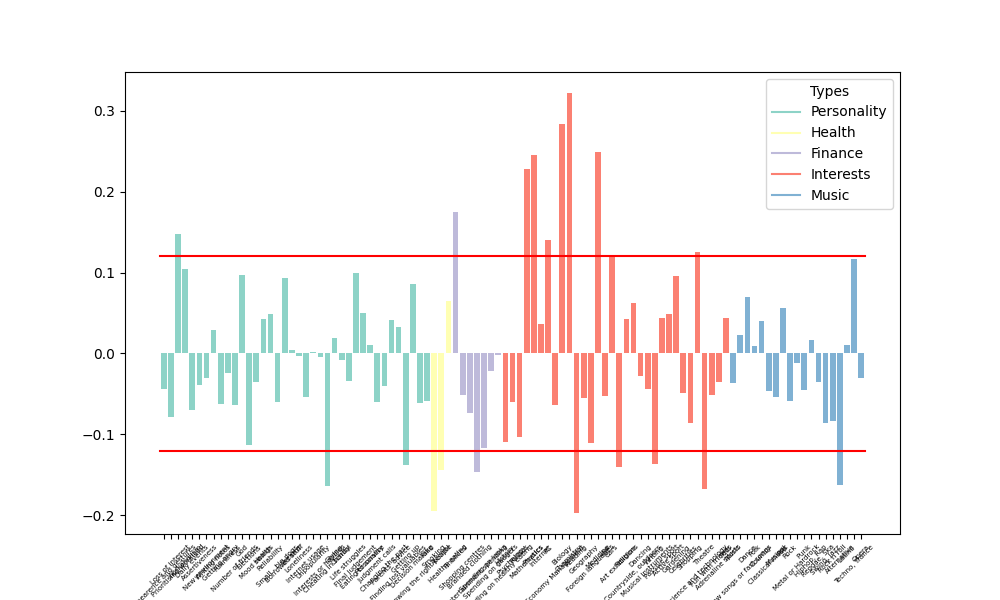


****************** PC4 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Prioritising workload', 'Finances', 'Mathematics', 'Physics', 'PC', 'Biology', 'Chemistry', 'Medicine', 'Cars', 'Science and technology']

HIGH-VALUED NEGATIVE COMPONENTS: ['Cheating in school', 'Getting up', 'Smoking', 'Alcohol', 'Entertainment spending', 'Reading', 'Art exhibitions', 'Writing', 'Theatre', 'Alternative']
*********************************************



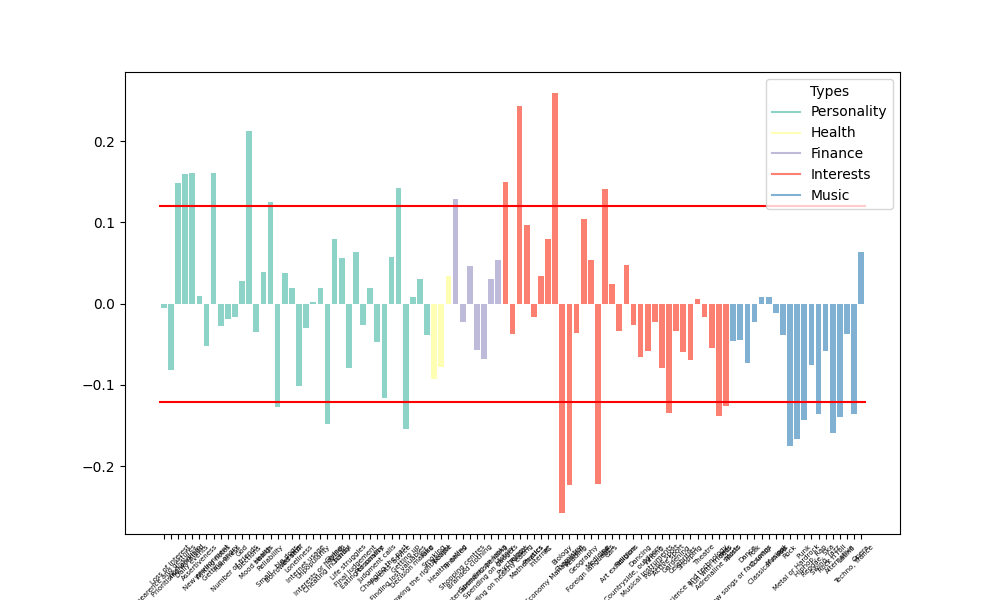


****************** PC5 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Prioritising workload', 'Workaholism', 'Daily events', 'Writing notes', 'Elections', 'Reliability', 'Finding lost valuables', 'Finances', 'History', 'Politics', 'Economy Management', 'Law']

HIGH-VALUED NEGATIVE COMPONENTS: ['Small - big dogs', 'Cheating in school', 'Getting up', 'Biology', 'Chemistry', 'Medicine', 'Active sport', 'Adrenaline sports', 'Pets', 'Rock', 'Metal or Hardrock', 'Punk', 'Reggae, Ska', 'Rock n roll', 'Alternative', 'Techno, Trance']
*********************************************



In [22]:
plot_pcs(X_df,pca_mm_m,m_mm)

PC1: art and culture

PC2: appearance, spender, fun lover

PC3: dynamic and socially active

PC4: proactive, goal-oriented, hard worker

PC5: alternative and impulsive

In [23]:
names_pc_mm=[ "art and culture",

"appearance, spender, fun lover",

"dynamic and socially active",

"proactive, goal-oriented, hard worker",

"alternative and impulsive"]

In [24]:
Ystd_df=pca_std_m.transform(Xstd_df)
Ymm_df=pca_mm_m.transform(Xmm_df)


In [25]:
def score_graph(df,names, pca):
    sg_3d = plt.figure(figsize=(6,6))
    ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
    ax_sg_3d.scatter(df[:,0],df[:,1],df[:,2], s=2)
    plt.title('SCORE GRAPH')
    ax_sg_3d.set_xlabel(names[0])
    ax_sg_3d.set_ylabel(names[1])
    ax_sg_3d.set_zlabel(names[2])
    plt.grid()
    plt.show()

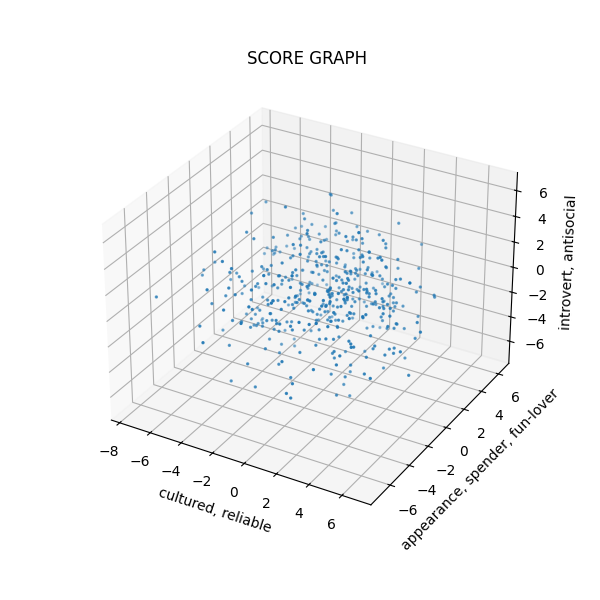

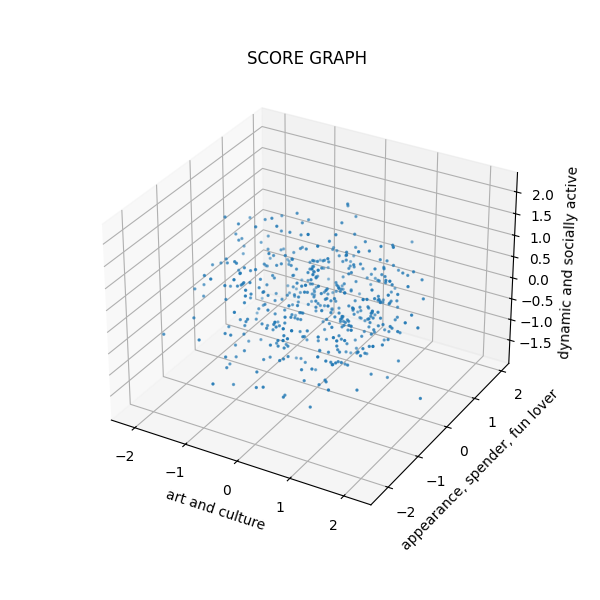

PCA(n_components=5)


In [26]:
score_graph(Ystd_df,names_pc_std,pca_std_m)
score_graph(Ymm_df,names_pc_mm,pca_mm_m)

print(pca_std_m)



In [27]:
def score_graph_label(df,names, pca,label):
    sg_3d = plt.figure(figsize=(8,8))
    ax_sg_3d = sg_3d.add_subplot(111, projection='3d')
    ax_sg_3d.scatter(df[:,0],df[:,1],df[:,2], s=5,c=label)
    plt.title('SCORE GRAPH')
    ax_sg_3d.set_xlabel(names[0])
    ax_sg_3d.set_ylabel(names[1])
    ax_sg_3d.set_zlabel(names[2])
    plt.grid()
    plt.show()

In [28]:
#for j in X_labels.columns:
 #   print("***********************************************************************",j)
  #  score_graph_label(Xstd_df,names_pc_std,pca_xstd_df,X_labels[j])

## Exercise 4. $k$-Means

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), run the $k$-Means for clustering the data. In particular, **use the silohuette score for identify the best value for $k\in\{3, \ldots, 10\}$**.
2. Plot the score graphs of exercise 3.3, adding the centroids of the cluster.
3. Observing the centroids coordinates in the PC space, **give a name/interpretation to them**, exploiting the names you assigned to the PCs. **Comment and motivate your interpretations**.

In [29]:
def kmeans_alg(df):
    km_list = []
    silcoeff_list = []
    k_list = list(range(3, 11))

    for i in range(len(k_list)):
        print(f'****************** START k-MEANS WITH k={k_list[i]} ******************')
        print('Computing...')
        km_list.append(KMeans(random_state=random_seed,n_clusters=k_list[i]))
        km = km_list[i]
        km.fit(df)
        silcoeff_list.append(silhouette_score(df,km.labels_))
        print(f'****************** END k-MEANS WITH k={k_list[i]} ******************')
        print('')

    i_best = np.argmax(silcoeff_list) 
    k = k_list[i_best]
    km = km_list[i_best]

    print('')
    print('')
    print('****************** RESULTS OF THE SEARCH... ******************')
    print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list)} --> k = {k}') 
    print('**************************************************************')

In [30]:
kmeans_alg(Ystd_df)
kmeans_alg(Ymm_df)

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************

****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************

****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************

****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************

****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************

****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************

****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************

****************** START k-MEANS WITH k=10 ******************


## Exercise 5. Cluster Evaluations

In the cells below, do the following operations:
1. For each one of the two datasets (_std_ and _mm_), perform an **external evaluation** of the clustering obtained at exercise 4.1 with respect to one or more labels in the list _labels_. **Comment the results, comparing the evaluation with the interpretation you gave at exercise 4.3**. 
2. For each one of the two datasets (_std_ and _mm_), perform an **internal evaluation** of each cluster, with respect to the silohuette score. **Comment the results**. 